ASSIGNMENT I
COMPUTING THE AREA OF THE MANDELBROT SET

1. Study the problem, implement the iteration and maybe create colourful pictures of the
fractal.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import random

# 设置图像的尺寸和分辨率
width, height = 200, 200
max_iter = 200
# 定义Mandelbrot集合的判定函数
def mandelbrot(c, max_iter):
    z = c
    for n in range(max_iter):
        if abs(z) > 2:
            return n
        z = z*z + c
    return max_iter

# 创建一个图像，初始化为黑色
img = np.zeros((height, width))
time = 0
# 遍历图像上的每个像素
for i in range(width):
    for j in range(height):
        # 将像素坐标映射到复平面上的点
        c = complex((i / width) * 3 - 2, (j / height) * 3 - 1.5)
        
        # 判断点是否属于Mandelbrot集合
        m = mandelbrot(c, max_iter)
        time += m
        # 根据迭代次数给点上色（这里使用了一个简单的颜色映射）
        img[j, i] = 255 - int(m * 255 / max_iter)
        #img[j, i] = random_number = random.randint(0, 255)
print(time)


1493768


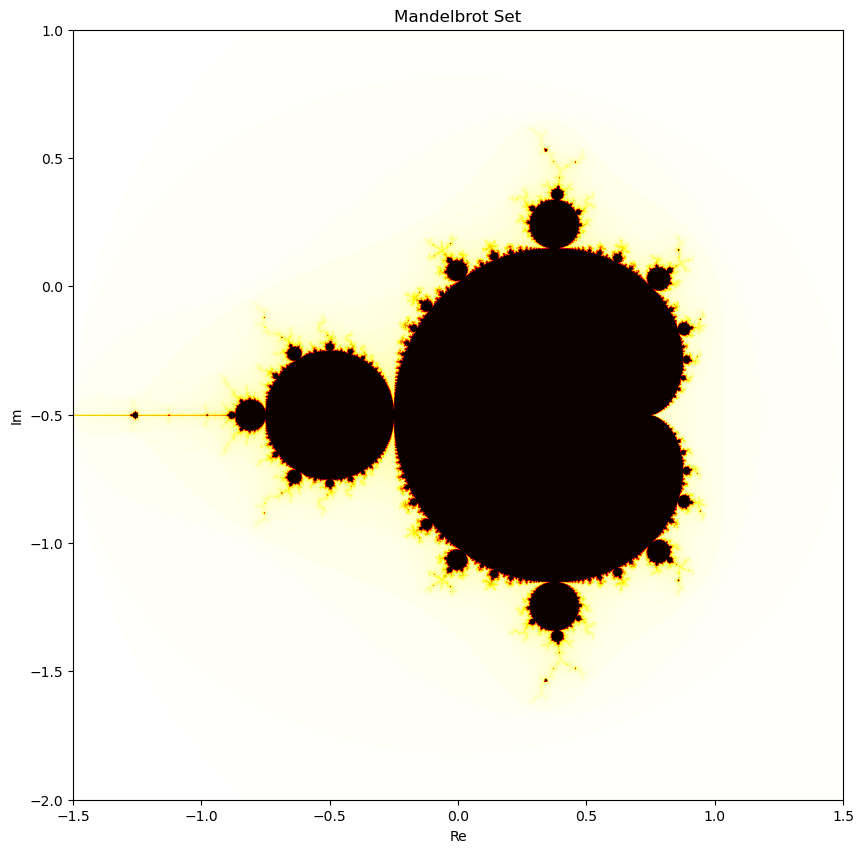

In [3]:
# 使用matplotlib显示结果
# Visualize with interpolation
plt.figure(figsize=(10, 10))
plt.imshow(img, cmap='hot', extent=(-1.5, 1.5, -2, 1))
plt.title('Mandelbrot Set')
plt.xlabel('Re')
plt.ylabel('Im')
plt.show()


In [4]:
from scipy.interpolate import pchip_interpolate
from matplotlib.colors import LinearSegmentedColormap

def custom_colourmap():
    #set up the control points for your gradient
    yR_observed = [0, 0,32,237, 255, 0, 0, 32]
    yG_observed = [2, 7, 107, 255, 170, 2, 7, 107]
    yB_observed = [0, 100, 203, 255, 0, 0, 100, 203]

    x_observed = [-.1425, 0, .16, .42, .6425, .8575, 1, 1.16]

    #Create the arrays with the interpolated values
    x = np.linspace(min(x_observed), max(x_observed), num=1000)
    yR = pchip_interpolate(x_observed, yR_observed, x)
    yG = pchip_interpolate(x_observed, yG_observed, x)
    yB = pchip_interpolate(x_observed, yB_observed, x)

    #Convert them back to python lists
    x = list(x)
    yR = list(yR)
    yG = list(yG)
    yB = list(yB)

    #Find the indexs where x crosses 0 and crosses 1 for slicing
    start = 0
    end = 0
    for i in x:
        if i > 0:
            start = x.index(i)
            break

    for i in x:
        if i > 1:
            end = x.index(i)
            break

    #Slice away the helper data in the begining and end leaving just 0 to 1
    x = x[start:end]
    yR = yR[start:end]
    yG = yG[start:end]
    yB = yB[start:end]

    # Normalize the color values to the [0, 1] range
    yR = np.array(yR) / 255.0
    yG = np.array(yG) / 255.0
    yB = np.array(yB) / 255.0

    # Append 0 to the end of yR, yG, and yB
    yR = np.append(yR, 0.0)
    yG = np.append(yG, 0.0)
    yB = np.append(yB, 0.0)

    # Create a custom colormap from the interpolated color values
    colors = np.column_stack((yR, yG, yB))  # Combine R, G, and B values
    cmap = LinearSegmentedColormap.from_list('custom_colormap', colors, N=256)
    
    return cmap


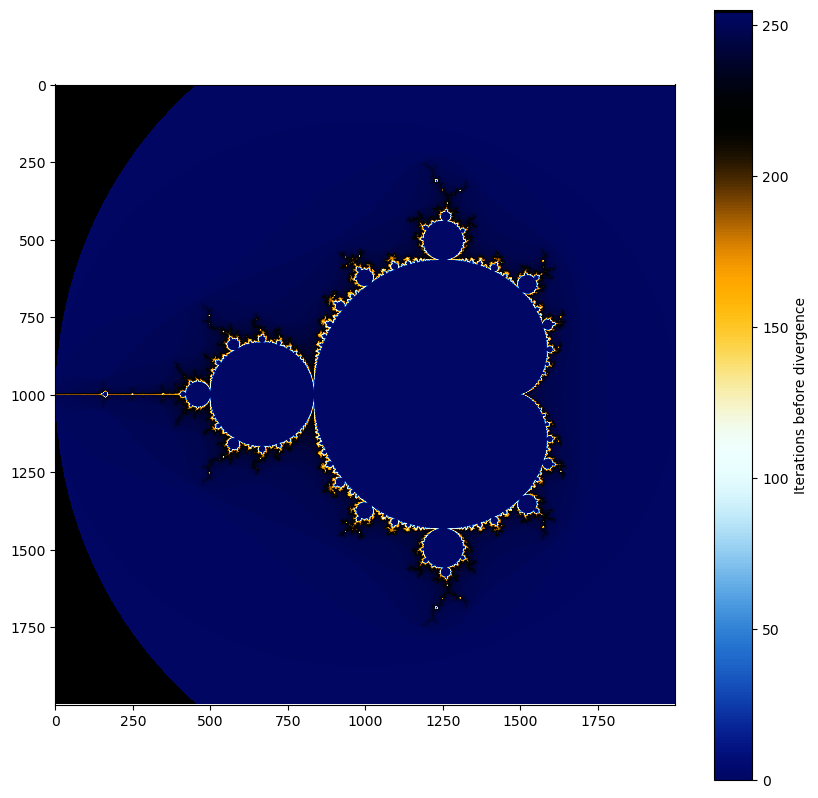

In [5]:
cmap = custom_colourmap()

# Create a figure and plot the data using the custom colormap
plt.figure(figsize=(10, 10))
plt.imshow(img, cmap=cmap)
plt.colorbar().set_label('Iterations before divergence')
plt.show()

Problem 2

In [6]:
import numpy as np

start = 25000 # 500 * 500
end = 400000 # 2000 * 2000
interval = (end - start) / 10

# 使用列表推导来生成所需的值
s_values = [start + i * interval for i in range(11)]  # 包括终点所以是range(11)

# 设置范围
x_range = [-2, 1]
y_range = [-1.5, 1.5]
s = 800000
max_iter = 1000
def random_sampling(s, x_range = [-2, 1], y_range = [-1.5, 1.5]):
    # 随机生成50个点
    x_points = np.random.uniform(x_range[0], x_range[1], s)
    y_points = np.random.uniform(y_range[0], y_range[1], s)

    # 将点组合成坐标对
    points = np.column_stack((x_points, y_points))
    return points

def mandelbrot(c, max_iter):
    z = c
    for n in range(max_iter):
        if abs(z) > 2:
            return n
        z = z*z + c
    return max_iter




test1

In [2]:
area_of_sample = (x_range[1] - x_range[0]) * (y_range[1] - y_range[0])
num_trials = 10
areas = []

# 进行十次计算
for _ in range(num_trials):
    points = random_sampling(s, x_range, y_range)
    in_mandelbrot = np.array([mandelbrot(complex(c[0], c[1]), max_iter) for c in points])
    proportion_in_set = np.sum(in_mandelbrot == max_iter) / s
    approx_area = proportion_in_set * area_of_sample
    areas.append(approx_area)

# 计算均值和方差
mean_area = np.mean(areas)
variance_area = np.var(areas)

# 打印结果
print(f"Mean area: {mean_area}")
print(f"Variance of area: {variance_area}")

# 绘制结果图表
trials = np.arange(1, num_trials + 1)
plt.plot(trials, areas, 'bo-', label='Approximate Areas')
plt.axhline(y=mean_area, color='r', linestyle='-', label='Mean Area')
plt.fill_between(trials, mean_area - np.sqrt(variance_area), mean_area + np.sqrt(variance_area), color='r', alpha=0.2, label='Variance Range')
plt.xlabel('Trial')
plt.ylabel('Approximated Area')
plt.title('Approximated Mandelbrot Set Area Across Trials')
plt.legend()
plt.show()

NameError: name 'x_range' is not defined

test2

In [1]:
s = 8000  # 样本点的数量固定为800,000
iter_values = [100, 200, 400, 800, 1600, 3200]  # 迭代次数的不同值
area_of_sample = (x_range[1] - x_range[0]) * (y_range[1] - y_range[0])
areas = []

fig, axs = plt.subplots(1, 3, figsize=(15, 5))



# 对于每个子图，运行计算并绘制结果
for i in range(3):
    areas = []  # 重置areas列表
    points = random_sampling(s, x_range, y_range)
    for max_iter in iter_values:
        in_mandelbrot = np.array([mandelbrot(complex(c[0], c[1]), max_iter) for c in points])
        proportion_in_set = np.sum(in_mandelbrot == max_iter) / s
        approx_area = proportion_in_set * area_of_sample
        areas.append(approx_area)

    # 在子图中绘制结果
    axs[i].plot(iter_values, areas, marker='o')
    axs[i].set_xlabel('Number of iterations')
    axs[i].set_ylabel('Approximated area of Mandelbrot Set')
    axs[i].set_title(f'Run {i+1}: Mandelbrot Set Area Approximation vs Iterations')
    axs[i].grid(True)

# 显示整个绘图窗口
plt.tight_layout()  # 调整子图布局，防止标签重叠
plt.show()

NameError: name 'x_range' is not defined

我认为为了了解到iteration的变化对于估计精度的提升，我们应当保持样本点的位置一致，很显然增加max_iter会使得我们估计的面积变小（这样有更多的点有机会逃逸），我们在这个问题中实际上是为了找到i,s的变化对于估计精度效率的提升。我的计划是这样的我们首先取一个大的s,1000000。进行10次不同的取样（每次对于不同的i），找到效率最高的i(可以通过计算平均精度提升和耗时之间的比值作为参数)，之后对于这个效率最高的i我们使用不用的S进行测试，找到效率与s的关系。最终确定一组i,s。
My plan is this: We first take a large s, like 1,000,00.0 Carry out 10 different samplings (each time for a different i) and find the most efficient i (you can calculate the ratio between average accuracy improvement and time-consuming as a parameter). Then for this most efficient i we use different S Conduct a test to find the relationship between efficiency and s. Finally determine a set of i,s.

the first step will take around 30 min. But then i will get much faster.
I am on it.

我认为，为了理解迭代次数变化带来的估计精度的提高，我们应该保持样本点的位置一致（即不要每次都改变随机种子）。如果使用不同的随机种子实际上是增加了不必要的扰动，对于得出迭代次数和估计精度的关系没有帮助。可以对于相同的S进行几次实验，如果这几次实验的结论都是相同的，那么也可以认为结果是显著的
I think that in order to understand the improvement in estimation accuracy brought by changes in the number of iterations, we should keep the positions of the sample points consistent (i.e. not change the random seed every time). If using different random seeds actually adds unnecessary perturbation, it will not help to derive the relationship between the number of iterations and the estimation accuracy. You can conduct several experiments on the same S. If the conclusions of these experiments are the same, then the results can also be considered significant.

test hanhan

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


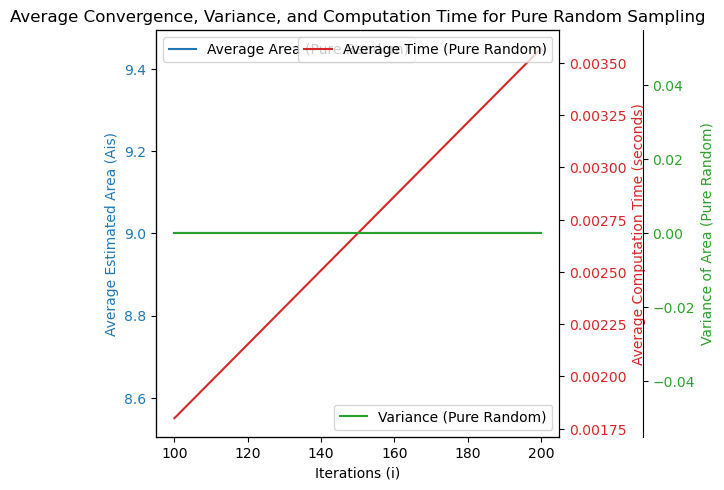

In [6]:
from time import time
# Set parameters for the area estimation
num_samples = 100
max_iter_range_adjusted = np.arange(100, 300, 100)
real_range = [-2, 1]
imag_range = [-1.5, 1.5]

def stability(c, max_iter = 200):
    z = 0
    for i in range(max_iter):
        z = mandelbrot(c, z)
        if abs(z) > 2:
            return i
    return max_iter

# Define the pure random sampling function
def pure_random_sampling(num_samples, real_range, imag_range):
    print(1)
    real_samples = np.random.uniform(real_range[0], real_range[1], num_samples)
    imag_samples = np.random.uniform(imag_range[0], imag_range[1], num_samples)
    return real_samples + 1j * imag_samples

# Define a function to estimate the area of the Mandelbrot set using sampling
def estimate_area(sampling_function, num_samples, real_range, imag_range, max_iter):
    samples = sampling_function(num_samples, real_range, imag_range)
    inside_count = 0
    for c in samples:
        if stability(c, max_iter) == max_iter:
            inside_count += 1
    area = (real_range[1] - real_range[0]) * (imag_range[1] - imag_range[0]) * inside_count / num_samples
    return area

# Define a function to calculate the convergence of Ais to Am for different values of i
def convergence_curve(sampling_function, num_samples, real_range, imag_range, max_iter_range, repetitions=100):
    all_areas = []
    all_times = []
    
    for _ in range(repetitions):
        areas = []
        times = []
        for max_iter in max_iter_range:
            start_time = time()
            area = estimate_area(sampling_function, num_samples, real_range, imag_range, max_iter)
            times.append(time() - start_time)
            areas.append(area)
        all_areas.append(areas)
        all_times.append(times)
    
    # Calculate means and variances for areas and times
    mean_areas = np.mean(all_areas, axis=0)
    mean_times = np.mean(all_times, axis=0)
    var_areas = np.var(all_areas, axis=0)
    
    return mean_areas, mean_times, var_areas, all_areas


# Calculate the convergence curve for pure random sampling with adjusted range
mean_areas_pure_random, mean_times_pure_random, var_areas_pure_random, all_areas_pure_random = convergence_curve(
    pure_random_sampling,
    num_samples,
    real_range,
    imag_range,
    max_iter_range_adjusted,
    repetitions=100  # Repeat each experiment 100 times
)

# Create the plot with two y-axes for pure random sampling only
fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('Iterations (i)')
ax1.set_ylabel('Average Estimated Area (Ais)', color=color)
ax1.plot(max_iter_range_adjusted, mean_areas_pure_random, label='Average Area (Pure Random)', color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(loc='upper left')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:red'
ax2.set_ylabel('Average Computation Time (seconds)', color=color)  # we already handled the x-label with ax1
ax2.plot(max_iter_range_adjusted, mean_times_pure_random, label='Average Time (Pure Random)', color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(loc='upper right')

# Add a new y-axis for variance
ax3 = ax1.twinx()
color = 'tab:green'
ax3.spines['right'].set_position(('outward', 60))  # Adjust the position of the new axis
ax3.set_ylabel('Variance of Area (Pure Random)', color=color)
ax3.plot(max_iter_range_adjusted, var_areas_pure_random, label='Variance (Pure Random)', color=color)
ax3.tick_params(axis='y', labelcolor=color)
ax3.legend(loc='lower right')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Average Convergence, Variance, and Computation Time for Pure Random Sampling')
plt.show()